In [58]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pywt
import os

In [63]:
def transfHaar(path, x):  
  LL = cv2.imread(path)
  LL = cv2.resize(LL, (512, 512))
  LL = cv2.cvtColor(LL, cv2.COLOR_BGR2GRAY)
  for i in range(x):
    LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  LL = LL.flatten()
  return LL

def draw(arr):
  n = int((len(arr))**0.5)
  data = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      data[i][j] = arr[i*n+j]
  fig = plt.figure(figsize=(6, 1.5))
  for i, a in enumerate([data]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_xticks([])
      ax.set_yticks([])
  fig.tight_layout()
  plt.show()

img_path = '/content/drive/MyDrive/2022-1/IA/data/dataset/'

files_names = os.listdir(img_path)
dataset_tumors = []
dataset_tumors_names = []

haar = 2

for file in files_names:
  result = transfHaar(img_path + file, haar)
  dataset_tumors.append(result)
  dataset_tumors_names.append(file)

# for i in range(len(dataset_tumors)):
#   print(dataset_tumors[i][1], dataset_tumors[i][0])
#   draw(dataset_tumors[i][0])


In [67]:
model = KNeighborsClassifier(n_neighbors = 3, weights='distance', algorithm='kd_tree', p=2, metric='euclidean')
model.fit(dataset_tumors, dataset_tumors_names)

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=3,
                     weights='distance')

Objeto 127.jpg


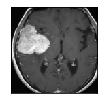


3 vecinos más cercanos: 


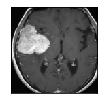

De 127.jpg


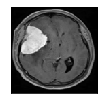

De 251.jpg


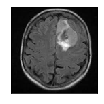

De 251.jpg


In [70]:
ind = np.random.choice(len(dataset_tumors), 1)[0]
obj = dataset_tumors[ind]
print("Objeto", dataset_tumors_names[ind])
draw(obj)
neighbors = model.kneighbors([obj], return_distance = False)[0]
print("\n3 vecinos más cercanos: ")
draw(dataset_tumors[neighbors[0]])
print("De", dataset_tumors_names[neighbors[0]])
draw(dataset_tumors[neighbors[1]])
print("De", dataset_tumors_names[neighbors[1]])
draw(dataset_tumors[neighbors[2]])
print("De", dataset_tumors_names[neighbors[1]])